# Python Hackathon Q&A

In [2]:
#importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime, date
import warnings

warnings.filterwarnings("ignore")


## Reading the datasets

In [3]:
Patients = pd.read_excel("HospitalDatabase .xlsx", "Patients")
Patients

,PatientID,FirstName,LastName,DateOfBirth,Gender,Race,Language
0,1,Lanni,Sue,1960-01-01 00:00:00.000,Male,White,English
1,2,Far,Myers,1985-11-15 02:08:42.090,Male,White,English
2,3,Devlin,Michael,1976-04-15 02:52:09.762,Male,White,English
3,4,Carmine,Texas,1968-10-15 03:32:13.635,Male,White,English
4,5,Tann,Bama,1962-05-01 19:12:58.950,Male,White,English
...,...,...,...,...,...,...,...
940,941,Wat,Fideler,1986-05-26 00:01:19.761,Male,Black/African-American,English
941,942,Wandie,Baythrop,1970-06-10 21:41:03.814,Male,Black/African-American,English
942,943,Diahann,Smeeton,1983-01-08 21:49:27.884,Male,Black/African-American,English
943,944,Panchito,Sharple,1963-06-05 07:57:05.569,Male,Black/African-American,English


In [3]:
EDVisits = pd.read_excel("HospitalDatabase .xlsx", "EDVisits")
EDVisits

,EDVisitID,PatientID,VisitDate,EDDischargeTime,Acuity,ReasonForVisit,EDDisposition
0,1,1,2020-01-01 00:00:00.000,2020-01-01 11:20:22.924,1,Stomach Ache,Admitted
1,12,12,2020-01-01 02:45:40.302,2020-01-02 02:00:00.517,2,Migraine,Admitted
2,13,13,2020-01-01 03:09:24.701,2020-01-01 05:00:20.852,3,Stomach Ache,Admitted
3,14,14,2020-01-01 03:12:19.349,2020-01-01 04:32:29.142,3,Migraine,Admitted
4,15,15,2020-01-01 03:46:32.698,2020-01-01 06:24:52.741,3,Chest Pain,Admitted
...,...,...,...,...,...,...,...
1194,1183,929,2020-01-15 10:38:42.570,2020-01-16 02:31:52.023,4,Chest Pain,Discharged
1195,1186,932,2020-01-15 11:52:37.540,2020-01-16 10:19:41.570,1,Pneumonia,Discharged
1196,1187,933,2020-01-15 12:11:11.678,2020-01-15 16:41:15.223,1,Pneumonia,Discharged
1197,1188,934,2020-01-15 12:21:46.006,2020-01-15 18:32:21.060,1,Pneumonia,Discharged


In [4]:
AmbulatoryVisits = pd.read_excel("HospitalDatabase .xlsx", "AmbulatoryVisits")
AmbulatoryVisits

,VisitID,PatientMRN,ProviderID,DateofVisit,DateScheduled,VisitDepartmentID,VisitType,BloodPressureSystolic,BloodPressureDiastolic,Pulse,VisitStatus
0,202,840,29,2019-03-19,2019-03-13 07:59:24.000,10,Physical,188.0,144.143427,83.044920,No Show
1,436,820,25,2019-03-19,2019-02-24 07:10:31.043,3,Follow Up,179.0,118.876808,90.309544,No Show
2,794,879,30,2019-04-02,2019-03-19 01:41:55.656,11,Telemedicine,133.0,98.749563,80.859776,No Show
3,799,884,37,2019-03-03,2019-02-25 01:25:39.696,4,Telemedicine,132.0,98.001270,82.184737,No Show
4,515,32,26,2019-03-16,2019-02-20 06:44:59.617,11,Telemedicine,131.0,85.115632,89.192362,No Show
...,...,...,...,...,...,...,...,...,...,...,...
945,788,873,1,2019-03-27,2019-03-10 17:19:48.264,5,Telemedicine,187.0,126.695141,70.049167,Canceled
946,703,855,36,2019-03-12,2019-02-19 02:27:52.664,10,Follow Up,182.0,140.703502,73.380812,Canceled
947,481,865,13,2019-05-03,2019-04-25 13:37:57.501,12,New,150.0,84.841197,61.625454,Canceled
948,398,635,10,2019-02-09,2019-02-08 11:40:35.137,1,Physical,177.0,125.037534,53.287036,Canceled


In [5]:
ReAdmissionRegistry = pd.read_excel("HospitalDatabase .xlsx", "ReAdmissionRegistry")
ReAdmissionRegistry

,AdmissionID,PatientID,AdmissionDate,DischargeDate,DischargeDisposition,Service,PrimaryDiagnosis,ExpectedLOS,ExpectedMortality,ReadmissionFlag,DaysToReadmission,EDVisitAfterDischargeFlag
0,389,1,2018-01-01,2018-01-04 19:59:31.391,Home,Hospitalist,Kidney Failure,6.717771,0.010046,NaN,NaN,NaN
1,635,2,2018-01-01,2018-01-04 21:28:51.898,Home,General Medicine,Flu,3.825969,0.604562,1.0,2.0,1.0
2,606,3,2018-01-01,2018-01-04 22:28:23.672,Home,General Medicine,Flu,3.382493,0.266137,1.0,3.0,1.0
3,587,5,2018-01-01,2018-01-05 05:47:04.933,Home,General Medicine,Flu,3.763352,0.307527,1.0,4.0,1.0
4,640,6,2018-01-01,2018-01-05 14:18:30.029,Home,ICU,Heart Failure,13.650953,0.408898,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
715,521,738,2018-02-22,2018-03-07 21:22:10.061,Home,Cardiology,AMI,13.725405,0.388319,NaN,NaN,NaN
716,548,739,2018-02-22,2018-03-08 02:43:18.749,Home,ICU,Pneumonia,11.355456,0.088518,NaN,NaN,NaN
717,509,740,2018-02-22,2018-03-08 09:27:18.377,Home,Hospitalist,Pneumonia,4.819882,0.503308,NaN,NaN,NaN
718,605,741,2018-02-22,2018-03-10 06:06:12.068,Home,General Medicine,Flu,3.123064,0.655870,NaN,NaN,NaN


In [6]:
Discharges = pd.read_excel("HospitalDatabase .xlsx", "Discharges")
Discharges

,AdmissionID,PatientID,AdmissionDate,DischargeDate,DischargeDisposition,Service,PrimaryDiagnosis,ExpectedLOS,ExpectedMortality
0,1,9,2018-01-01,2018-01-07 18:06:06.408,Expired,Cardiology,AMI,9.646857,0.061540
1,257,93,2018-01-06,2018-01-18 02:59:04.667,Expired,Cardiology,Broken Leg,6.816558,0.628827
2,152,101,2018-01-07,2018-01-11 16:16:06.782,Expired,Cardiology,Kidney Failure,6.580273,0.573887
3,361,102,2018-01-07,2018-01-15 04:48:33.134,Expired,Cardiology,Afib,12.794536,0.222163
4,258,103,2018-01-07,2018-01-15 13:32:36.157,Expired,Cardiology,Broken Leg,2.639297,0.055468
...,...,...,...,...,...,...,...,...,...
715,715,716,2018-02-21,2018-03-06 03:31:05.262,Transfer,ICU,Heart Failure,11.362095,0.370695
716,698,723,2018-02-22,2018-02-26 15:09:02.584,Transfer,ICU,Heart Failure,10.262312,0.812930
717,704,724,2018-02-22,2018-02-27 07:59:32.385,Transfer,General Medicine,Pneumonia,6.036234,0.094128
718,716,733,2018-02-22,2018-03-05 12:31:55.958,Transfer,ICU,Heart Failure,13.323413,0.490892


In [7]:
Providers = pd.read_excel("HospitalDatabase .xlsx", "Providers")
Providers

,ProviderID,ProviderName,ProviderSpecialty,ProviderDateOnStaff
0,1,Sally Sue,Pediatrics,1993-01-01 00:00:00.000
1,2,Mike Myers,Pediatrics,1993-05-02 00:00:17.695
2,3,Jordan Michael,Pediatrics,1993-06-24 21:31:46.687
3,4,Ted Texas,Pediatrics,1993-12-23 21:33:52.299
4,5,Ala Bama,Pediatrics,1995-01-10 02:53:47.838
5,6,Harry Kane,Pediatrics,1995-07-21 03:49:03.310
6,7,Barry Bar,Pediatrics,1995-11-21 19:30:38.759
7,8,Ted Green,Pediatrics,1996-05-30 06:14:52.539
8,9,Ted Black,Pediatrics,1997-02-20 08:01:10.211
9,10,Fred Man,Surgery,1998-03-17 01:47:18.794


In [8]:
EDUnique = pd.read_excel("HospitalDatabase .xlsx", "EDUnique")
EDUnique

,EDVisitID,PatientID,VisitDate,EDDischargeTime,Acuity,ReasonForVisit,EDDisposition
0,1,1,2020-01-01 00:00:00.000,2020-01-01 11:20:22.924,1,Stomach Ache,Admitted
1,12,12,2020-01-01 02:45:40.302,2020-01-02 02:00:00.517,2,Migraine,Admitted
2,13,13,2020-01-01 03:09:24.701,2020-01-01 05:00:20.852,3,Stomach Ache,Admitted
3,14,14,2020-01-01 03:12:19.349,2020-01-01 04:32:29.142,3,Migraine,Admitted
4,15,15,2020-01-01 03:46:32.698,2020-01-01 06:24:52.741,3,Chest Pain,Admitted
...,...,...,...,...,...,...,...
940,1183,929,2020-01-15 10:38:42.570,2020-01-16 02:31:52.023,4,Chest Pain,discharged
941,1186,932,2020-01-15 11:52:37.540,2020-01-16 10:19:41.570,1,Pneumonia,discharged
942,1187,933,2020-01-15 12:11:11.678,2020-01-15 16:41:15.223,1,Pneumonia,discharged
943,1188,934,2020-01-15 12:21:46.006,2020-01-15 18:32:21.060,1,Pneumonia,discharged


#### 1.Make a pair plot on Readmission Registry table & do u see any correlation between columns values.

<Figure size 720x432 with 0 Axes>

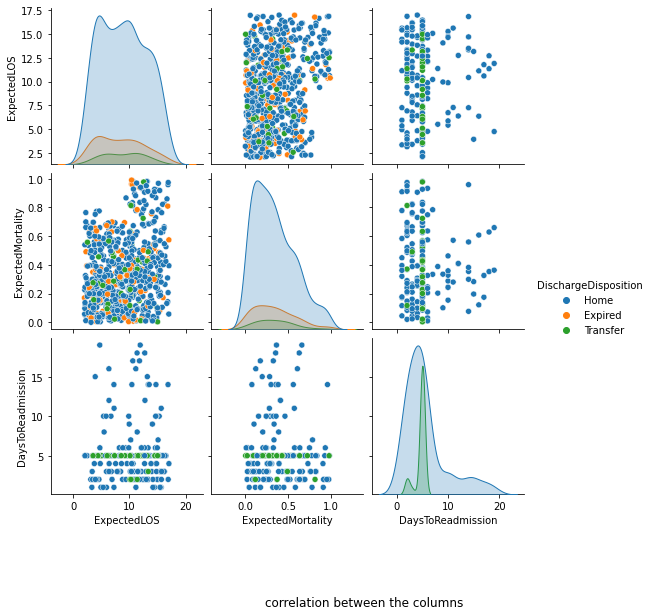

In [9]:
plt.figure(figsize=(10,6))
sns.pairplot(ReAdmissionRegistry, vars=['ExpectedLOS', 'ExpectedMortality',  'DaysToReadmission'],hue='DischargeDisposition')
plt.title('correlation between the columns',y=-0.75,x=-0.05)
plt.show()

#### 2.Using iloc, retrieve the firstname and lastname of patients between indices 101 and 200.


In [10]:
Patients.iloc[101:201,[1,2]]

,FirstName,LastName
101,Gipsy,Frankton
102,Jethro,Wharin
103,Viv,Aylward
104,Swift,Dreschler
105,Fadel,Jacquemard
...,...,...
196,Noam,Laguerre
197,Arie,Bayless
198,Janaye,O'Mohun
199,Fonz,Group


#### 3.Create a figure object called fig using plt.figure() **
 ** Use add_axes to add an axis to the figure canvas at [0,0,1,1]. Call this new axis ax. **
 ** Plot (x,y) on that axes and set the labels.
 Note : You can plot on any x,y set of values.

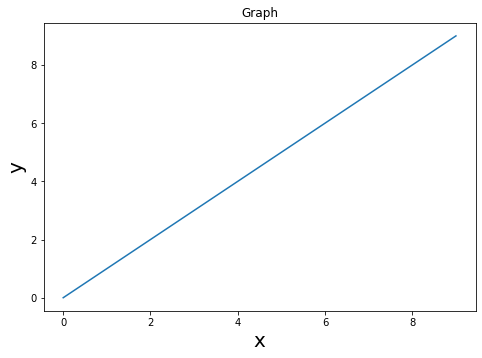

In [11]:
x = range(0, 10)
y = range(0, 10)
fig=plt.figure()
ax=fig.add_axes([0,0,1,1])
ax.plot(x,y)
ax.set_xlabel("x",fontsize=20)
ax.set_ylabel("y",fontsize=20)
ax.set_title("Graph")
plt.show()   

#### 4.Display data by splitting age in 4 quartiles and labeling the quartiles.

In [12]:
Patients['Converted_dob']=Patients['DateOfBirth'].dt.strftime("%d/%m/%Y")
def age(born):
    born = datetime.strptime(born, "%d/%m/%Y").date()
    today = date.today()
    return today.year - born.year - ((today.month, 
                                      today.day) < (born.month, 
                                                    born.day))
Patients['Age'] = Patients['Converted_dob'].apply(age)
Quartile_Age =Patients['Age'].quantile([ 0.25,  0.5, 0.75,1])
index_Label = (['1st Quantile','2nd Quantile','3rd Quantile','4th Quantile']) 
Quartile_Age.index =index_Label
Quartile_Age

1st Quantile    42.0
2nd Quantile    48.0
3rd Quantile    56.0
4th Quantile    62.0
Name: Age, dtype: float64

#### 5.Display full name of patients who are born in 1986

In [13]:
data_1986 = Patients[pd.DatetimeIndex(Patients.DateOfBirth).year==1986]
data_1986['FullName']=data_1986['FirstName']+ '' + data_1986['LastName']
data_1986['FullName']


23         Gabriel Joseph
24         Lincoln Brenda
29             AlaHalpert
72            LolitaDarci
164         FadelBernardt
238         BentleyKippax
367            ValeOlanda
373          BrittDureden
386       CristabelChatel
415       ConstantiaGroup
452       MorganScrowston
561             DomBaglow
568        IgnazioMelling
595         HomenickRings
639           HashimSlark
643       EllieRamsbotham
674        LlewellynGroup
714             NilesShaw
733             YvetteInc
777          SiouxieGroup
852            CarlyGroup
868        WorthPickering
877           ArniBaldack
909       KuvalisCoupland
922    RebbeccaRollingson
940            WatFideler
Name: FullName, dtype: object

#### 6.Create a jointplot on expected mortality & expected length of stay.

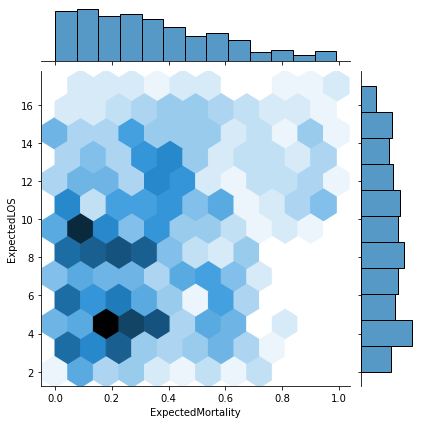

In [14]:
sns.jointplot(x='ExpectedMortality' ,y ='ExpectedLOS' ,data=Discharges, kind='hex')
plt.show()

#### 7.Create a pair plot on whole dataframe by taking parameter "hue" as EDDisposition.

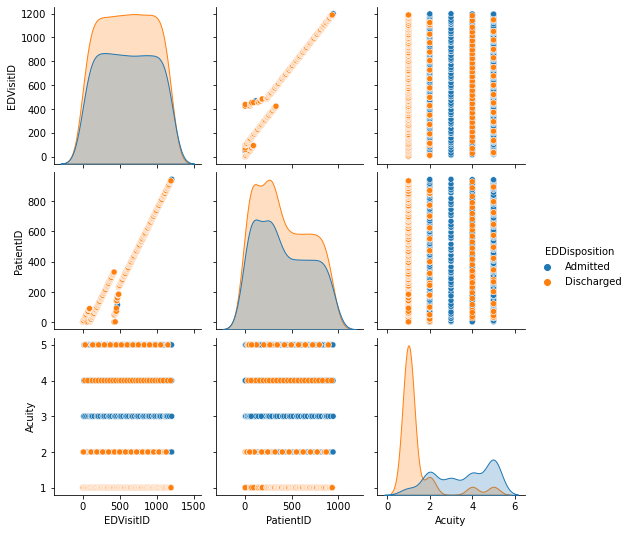

In [15]:
sns.pairplot(EDVisits, hue='EDDisposition')

# 8.Create a bar chart between expectedLOS & Primary diagnosis.

In [1]:
plt.figure(figsize=(15,6))
ax = sns.barplot(x='ExpectedLOS',y='PrimaryDiagnosis',data=ReAdmissionRegistry)
ax.bar_label(ax.containers[0], label_type='center')
plt.show()

NameError: name 'plt' is not defined

# 9.Get the list of patient ID's which are not there in ReadmissionRegistry.

In [ ]:
dpatientid = Patients['PatientID']
readmissionid = ReAdmissionRegistry['PatientID'].drop_duplicates()
# Patients id not in ReAdmissionRegistery
Patinentid_nt = dpatientid[~dpatientid.isin(readmissionid)].dropna()
Y = Patinentid_nt.tolist()
print(Y, end=" ")

# 10.Create a boxplot on ExpectedLOS by taking service into account.

In [ ]:
plt.figure(figsize=(15,6))
sns.boxplot(x='Service',y='ExpectedLOS',data=ReAdmissionRegistry)
plt.title('ExpectedLOS by services')
plt.show()

# 11.Create a pie chart by taking Service= ["ICU", "Neurology", "General", "Medicine"] & ExpectedLOS=[10,5,7,9] & explode the

In [ ]:
plt.figure(figsize=(15,6))
Service= ["Icu", "Neurology", "General", "Medicine"]
EcpectedLOS=[10,5,7,9]
outside = (0.5, 0, 0, 0)
colors = ('#22a6b3', '#e056fd', '#eb4d4b', '#badc58')
plt.pie(EcpectedLOS, labels=Service, explode=outside, autopct="%.1f", shadow=True, startangle=90, colors=colors) 
plt.title("Pie Chart between Service & ExpectedLOS", fontsize=20)
plt.show()

# 12.Connect to sql and write a query to get list of Provider names whose Providername is starting with letter T.

In [ ]:
pip install psycopg2
import psycopg2 as pst

# 13.Create a subplot on x = np.arange(0, 10, 0.1) , y = np.sin(np.pi * x) + x with 2 rows & 2 columns with object oriented approach

In [ ]:
plt.figure(figsize=(15,6))
x = np.arange(0,10,0.1)
y = np.sin(np.pi * x) + x
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2)
fig.suptitle('Sharing x per column, y per row')
ax1.plot(x, y)
ax2.plot(x, y**2, 'tab:orange')
ax3.plot(x, -y, 'tab:green')
ax4.plot(x, -y**2, 'tab:red')

for ax in fig.get_axes():
    ax.label_outer()
plt.show()

# 14.Find the number of null values in BloodPressureSystolic column.

In [ ]:
AmbulatoryVisits['BloodPressureSystolic'].isnull().sum()

In [ ]:
#15.Replace all the null values in ReadmissionFlag with 0.

ReAdmissionRegistry['ReadmissionFlag'].fillna(0, inplace=True)

In [ ]:
#16.Plot a graph to show the distribution of expected length of stay.
plt.figure(figsize=(15,6))
sns.distplot(ReAdmissionRegistry['ExpectedLOS'],kde=False,bins=10)
plt.title('distribution of expected length of stay',fontsize=20)
plt.ylabel('Count of people')
plt.show()

In [ ]:
#17.Create a heat map to show the correlation between the column values of Edvisits.
Edc=EDVisits.corr()
Edc

In [ ]:
plt.figure(figsize=(15,6))
sns.heatmap(Edc,annot=True,cmap='viridis')
plt.title("Correlation between the column values of Edvisits", fontsize=20)
plt.show()

In [ ]:
#18.Add column 'Age' in Patient table.
import datetime
def from_dob_to_age(born):
    today = datetime.date.today()
    return today.year - born.year - ((today.month, today.day) < (born.month, born.day))
df_age=Patients['DateOfBirth'].apply(lambda x: from_dob_to_age(x))
df_age
Patients['Age']=df_age
Patients

In [ ]:
#19.Create a dataframe with date and time as columns, where the values are the discharge time from readmissionregistry sheet.
df=pd.DataFrame()
df['Dates'] = pd.to_datetime(ReAdmissionRegistry['DischargeDate']).dt.date
df['Time'] = pd.to_datetime(ReAdmissionRegistry['DischargeDate']).dt.time
df

In [ ]:
#20.Count of number of patients admitted based on Primary Diagnosis and Service provided.
Discharges.groupby(['PrimaryDiagnosis','Service'])['PatientID'].count()